# Performance Optimization and Monetization Strategy for Serenity’s Spa Mobile Game

## **Introduction**
This document is created to analyze the performance of the mobile game *Serenity’s Spa* and provide actionable recommendations to improve player engagement, retention, and monetization. By leveraging player data and mobile gaming metrics, this analysis aims to identify areas of opportunity, evaluate the effectiveness of recent feature implementations, and propose strategies for further optimization.

The objective is to align the game's development and feature roadmap with industry best practices, ensuring *Serenity’s Spa* remains competitive in the global mobile gaming market while maximizing player satisfaction and revenue potential.

## **Objectives**
The primary objectives of this document are to:
1. Identify key levels driving or hindering player progression and propose targeted improvements.
2. Evaluate the impact of the newly launched leaderboard feature on player engagement and revenue.
3. Assess the results of an AB test on in-app purchase (IAP) pricing and derive actionable insights to enhance monetization.
4. Recommend strategies for future updates to ensure sustainable growth in engagement and revenue.

## **Scope**
This analysis focuses on:
- Player progression data from the level funnel.
- Metrics related to the leaderboard feature, such as DAU, ARPDAU, and playtime.
- Data from an AB test on IAP pricing to evaluate its impact on conversion and revenue.
  
The scope excludes detailed gameplay mechanics unrelated to the provided datasets and assumes all external data sources are accurate and up-to-date.

## **Methodology/Approach**
1. **Level Funnel Analysis:** Identify good and bad levels based on player progression and retention data.
2. **Leaderboard Evaluation:** Calculate key performance indicators (e.g., DAU, ARPDAU) and assess their alignment with feature objectives.
3. **AB Test Analysis:** Conduct statistical evaluation to validate the test and analyze the impact on player purchasing behavior.
4. **Recommendations:** Synthesize findings into actionable strategies for feature improvements and monetization optimization.

## **Expected Outcomes**
This analysis aims to:
- Highlight critical levels that require redesign or enhancement to boost player retention.
- Assess the success and areas for improvement of the leaderboard feature in driving engagement and revenue.
- Provide actionable insights into player purchasing behaviors from the AB test and suggest strategies for future monetization experiments.
- Deliver data-backed recommendations that align with organizational goals to enhance *Serenity’s Spa*’s market performance.

# **FUNNEL LEVEL ANALYSIS "SERENITY'S SPA "**
### Problem Definition & Business Objectives

- **Business Objective:** Improve player retention, maximise *player engagement*, and ensure optimal play experience on every level. This is achieved by identifying problematic levels and providing improvement recommendations.
- **Problem Definition:** There are potential issues with some levels that affect the play experience, such as difficulty levels that are too high/low, duration that is too long/short, or overuse of *boosters*. This could potentially lead to *churn* or player boredom.
- **Approach:** Quantitative analysis using level *funnel* data to identify patterns and anomalies.

### Scope

**Variables:**

1.  **Levels and Sub_levels:** Level/sub-level structure.
2.  **Unique_User_Start_Count:** The number of players who started the level.
3.  **Unique_User_Complete_Count:** The number of players who completed the level.
4.  **Average attempts to complete the level.
5.  **Median_Time_to_Complete:** The median time it took the player to complete the level.
6.  **Avg_Boosters_Usage_Per_User:** Average *booster* usage per player.

**Limitations:** This analysis focuses on *in-game* data and does not consider external factors such as *game updates*, *events*, or promotions that may affect level performance.


### Formulation of Research Questions

1.  Identify which level is "good" and why.
2.  Identify which levels are "bad" and why.
3.  What are the suggestions to improve those levels.


### 4. Identify Approach

**Type of Analysis:** Descriptive Analysis and Diagnostic Analysis.

**Methods:**

* **Funnel Analysis*:** Calculating the completion rate and drop-off rate at each level.
* **Descriptive Statistics Analysis:** Calculating the mean, median, and distribution of the variables.
* Benchmarking:** Comparing level metrics to an overall average or to a level that is considered the "standard" or "ideal".
* **Correlation (optional):** Look for correlations between variables, for example between *Avg_Attempt* and *Avg_Boosters_Usage_Per_User*.


### Success Metrics

* Overall Completion Rate:** Percentage of players who completed the entire level analysed.
* Identification of "Good" and "Bad" Levels:** Based on established criteria.
* Implementable Improvement Recommendations:** Specific and actionable suggestions for problematic levels.

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
data = pd.read_csv("/kaggle/input/level-funnel/Level_Funnel - (Q1) Level Funnel.csv")
#define lambda to run query
sql = lambda q: sqldf(q, globals())

data.head()

,Level,Sub_level,Unique_User_Start_Count,Unique_User_Complete_Count,Avg_Attempt,Median_Time_to_Complete,Avg_Boosters_Usage_Per_User
0,1,1,"2,500","2,431",1.0,0.0,0.00
1,1,2,510,504,1.0,40.0,0.00
2,1,3,433,431,1.0,48.0,0.01
3,2,1,"2,389","2,203",1.0,49.0,0.00
4,2,2,452,450,1.0,39.0,0.01


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Level                        120 non-null    int64  
 1   Sub_level                    120 non-null    int64  
 2   Unique_User_Start_Count      120 non-null    object 
 3   Unique_User_Complete_Count   120 non-null    object 
 4   Avg_Attempt                  120 non-null    float64
 5   Median_Time_to_Complete      120 non-null    float64
 6   Avg_Boosters_Usage_Per_User  120 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.7+ KB


Unique User Start Count and Unique User Complete Count, which have the data type object. This may happen because the numbers in those columns contain non-numeric characters such as commas (,). These data types need to be converted to numeric to allow calculations such as Completion Rate or Drop-off Rate.

In [3]:
# Change data type
data['Unique_User_Start_Count'] = data['Unique_User_Start_Count'].str.replace(',','').astype(int)
data['Unique_User_Complete_Count'] = data['Unique_User_Complete_Count'].str.replace(',','').astype(int)
#check result
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Level                        120 non-null    int64  
 1   Sub_level                    120 non-null    int64  
 2   Unique_User_Start_Count      120 non-null    int64  
 3   Unique_User_Complete_Count   120 non-null    int64  
 4   Avg_Attempt                  120 non-null    float64
 5   Median_Time_to_Complete      120 non-null    float64
 6   Avg_Boosters_Usage_Per_User  120 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 6.7 KB


In [4]:
#query1 Calculate additional metrics
query1="""
SELECT 
    *,
    (Unique_User_Complete_Count) * 100.0 / (Unique_User_Start_Count) AS Completion_Rate,
    (100.0 - (Unique_User_Complete_Count) * 100.0 / (Unique_User_Start_Count)) AS Churn_Rate
FROM data
GROUP BY Level, Sub_level
ORDER BY Level, Sub_level;
"""
#run query
calculated=sql(query1)
print("Completion Rate and Churn Rate")

# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(calculated)

Completion Rate and Churn Rate


,Level,Sub_level,Unique_User_Start_Count,Unique_User_Complete_Count,Avg_Attempt,Median_Time_to_Complete,Avg_Boosters_Usage_Per_User,Completion_Rate,Churn_Rate
0,1,1,2500,2431,1.000000,0.000000,0.000000,97.240000,2.760000
1,1,2,510,504,1.000000,40.000000,0.000000,98.823529,1.176471
2,1,3,433,431,1.000000,48.000000,0.010000,99.538106,0.461894
3,2,1,2389,2203,1.000000,49.000000,0.000000,92.214316,7.785684
4,2,2,452,450,1.000000,39.000000,0.010000,99.557522,0.442478
5,2,3,404,404,1.000000,38.000000,0.010000,100.000000,0.000000
6,3,1,2173,2047,1.000000,56.000000,0.010000,94.201565,5.798435
7,3,2,430,429,1.000000,44.000000,0.000000,99.767442,0.232558
8,3,3,391,391,1.000000,43.000000,0.000000,100.000000,0.000000
9,4,1,2013,1919,1.000000,55.000000,0.010000,95.330353,4.669647


In [5]:
# Check for anomalies in the data
outliers = calculated[calculated['Completion_Rate'] > 100]
print("Data outliers:")
print(outliers[['Level', 'Sub_level', 'Unique_User_Start_Count', 'Unique_User_Complete_Count', 'Completion_Rate', 'Churn_Rate']])

# Adjust outlier values directly in the 'calculated' DataFrame
calculated.loc[calculated['Completion_Rate'] > 100, 'Unique_User_Start_Count'] = calculated['Unique_User_Complete_Count']

# Recalculate Completion Rate and Churn Rate
calculated['Completion_Rate'] = (calculated['Unique_User_Complete_Count'] / calculated['Unique_User_Start_Count']) * 100
calculated['Churn_Rate'] = 100 - calculated['Completion_Rate']

# Display Completion Rate for specific levels
levels_to_display = [5, 17, 20, 23, 36]
filtered_data = calculated[calculated['Level'].isin(levels_to_display)][
    ['Level', 'Sub_level', 'Unique_User_Start_Count', 'Unique_User_Complete_Count', 'Completion_Rate', 'Churn_Rate']
]

print("\nCompletion Rate for specific levels:")
print(filtered_data)

Data outliers:
     Level  Sub_level  Unique_User_Start_Count  Unique_User_Complete_Count  \
13       5          2                      412                         413   
50      17          3                      269                         270   
59      20          3                      257                         258   
68      23          3                      223                         224   
105     36          1                      467                         468   

     Completion_Rate  Churn_Rate  
13        100.242718   -0.242718  
50        100.371747   -0.371747  
59        100.389105   -0.389105  
68        100.448430   -0.448430  
105       100.214133   -0.214133  

Completion Rate for specific levels:
     Level  Sub_level  Unique_User_Start_Count  Unique_User_Complete_Count  \
12       5          1                     1898                        1847   
13       5          2                      413                         413   
14       5          3             

### Exploratory Data Analysis (EDA)

Descriptive Statistics:
             Level  Sub_level  Unique_User_Start_Count  \
count  120.000000  120.00000               120.000000   
mean    20.500000    2.00000               618.525000   
std     11.591797    0.81992               513.948596   
min      1.000000    1.00000               131.000000   
25%     10.750000    1.00000               291.750000   
50%     20.500000    2.00000               421.000000   
75%     30.250000    3.00000               734.750000   
max     40.000000    3.00000              2500.000000   

       Unique_User_Complete_Count  Avg_Attempt  Median_Time_to_Complete  \
count                  120.000000   120.000000               120.000000   
mean                   610.983333     1.030833                62.637500   
std                    497.800827     0.101083                19.635113   
min                    129.000000     1.000000                 0.000000   
25%                    290.750000     1.000000                50.000000   
50%        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

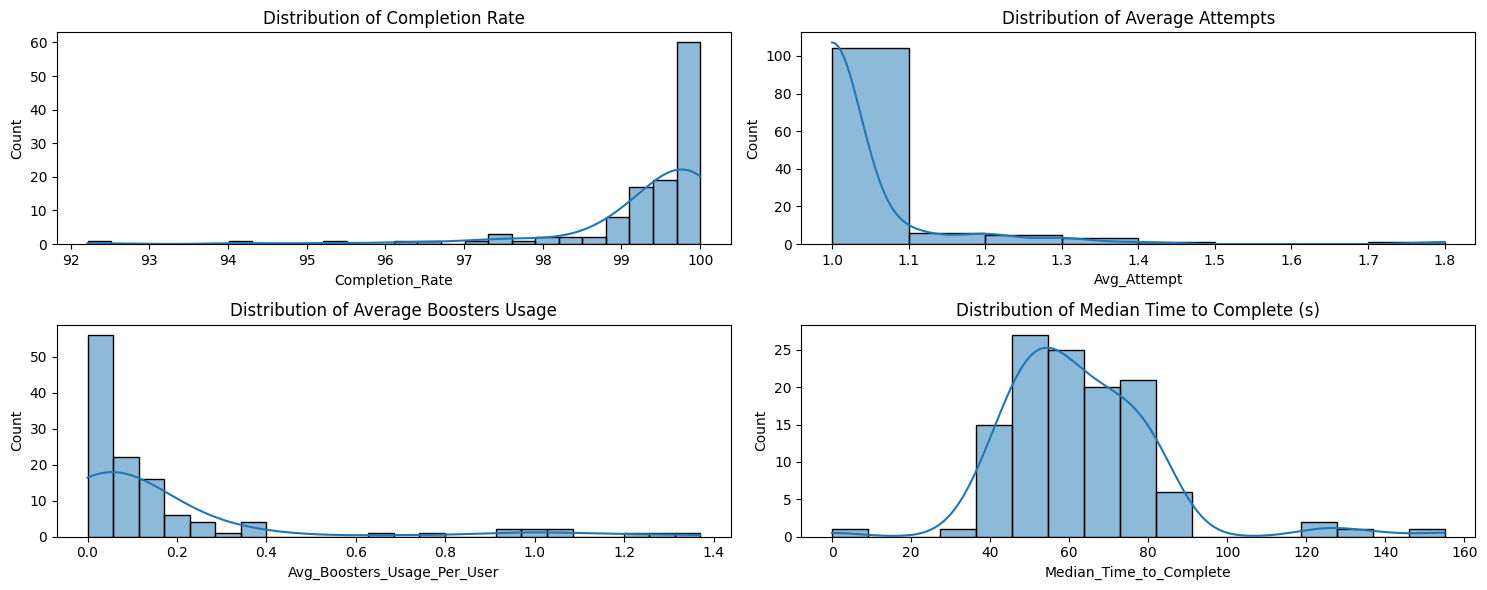

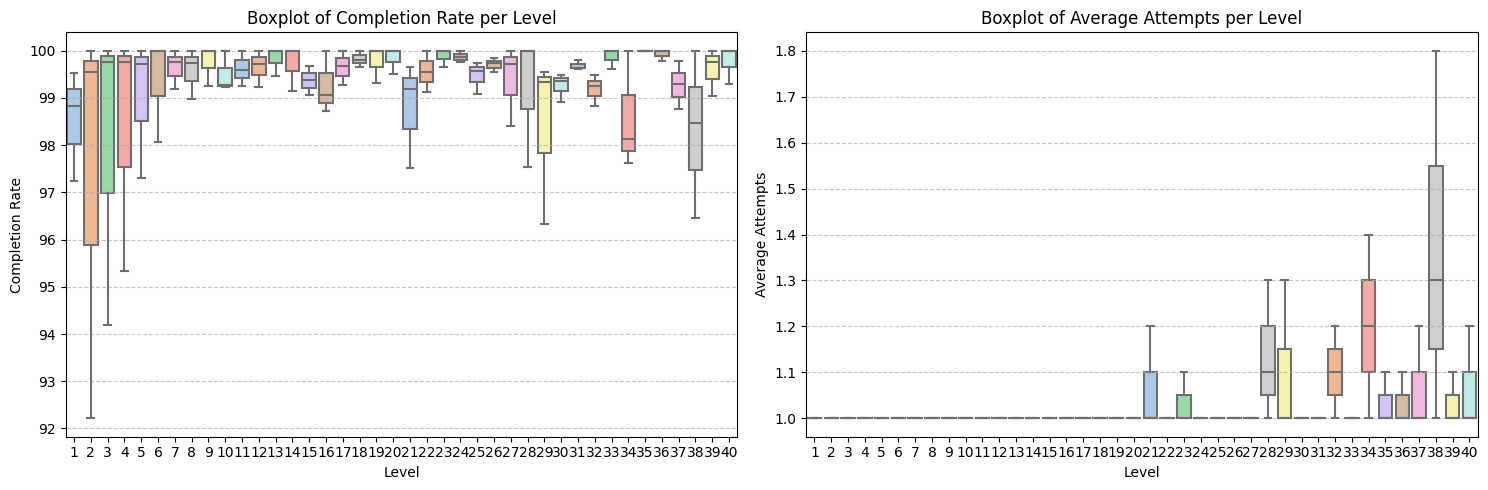

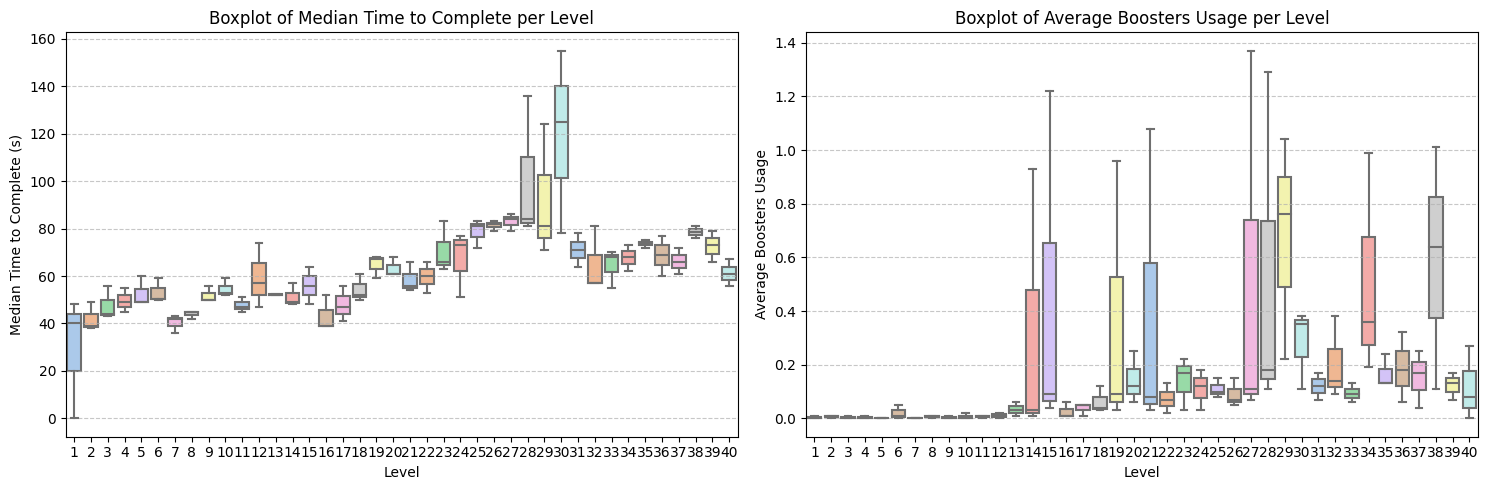

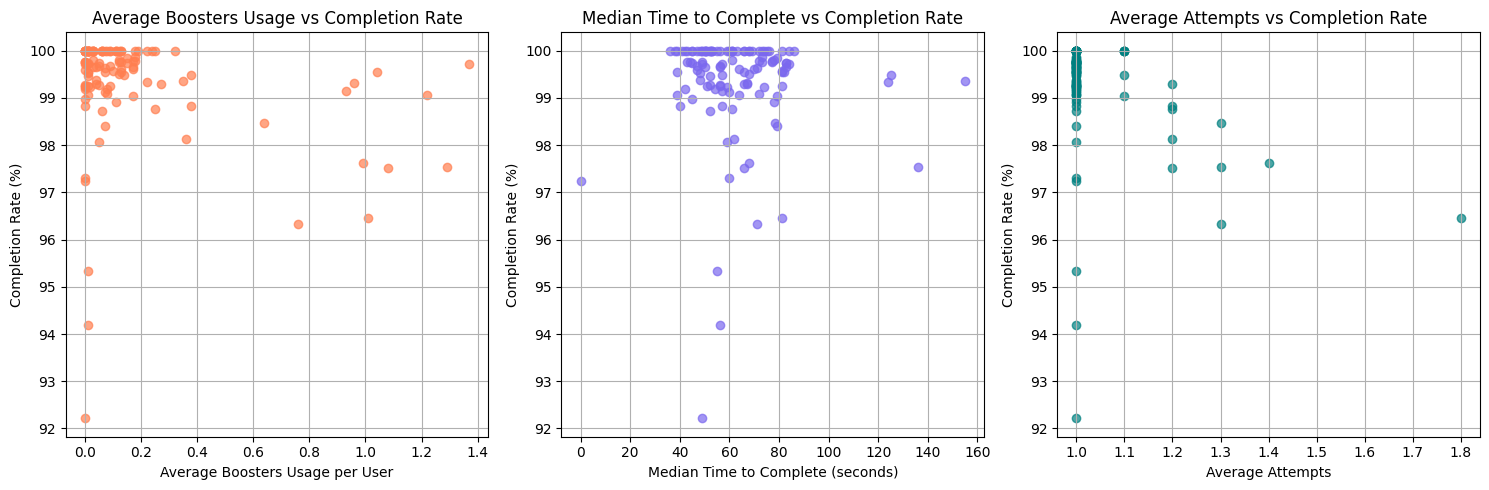

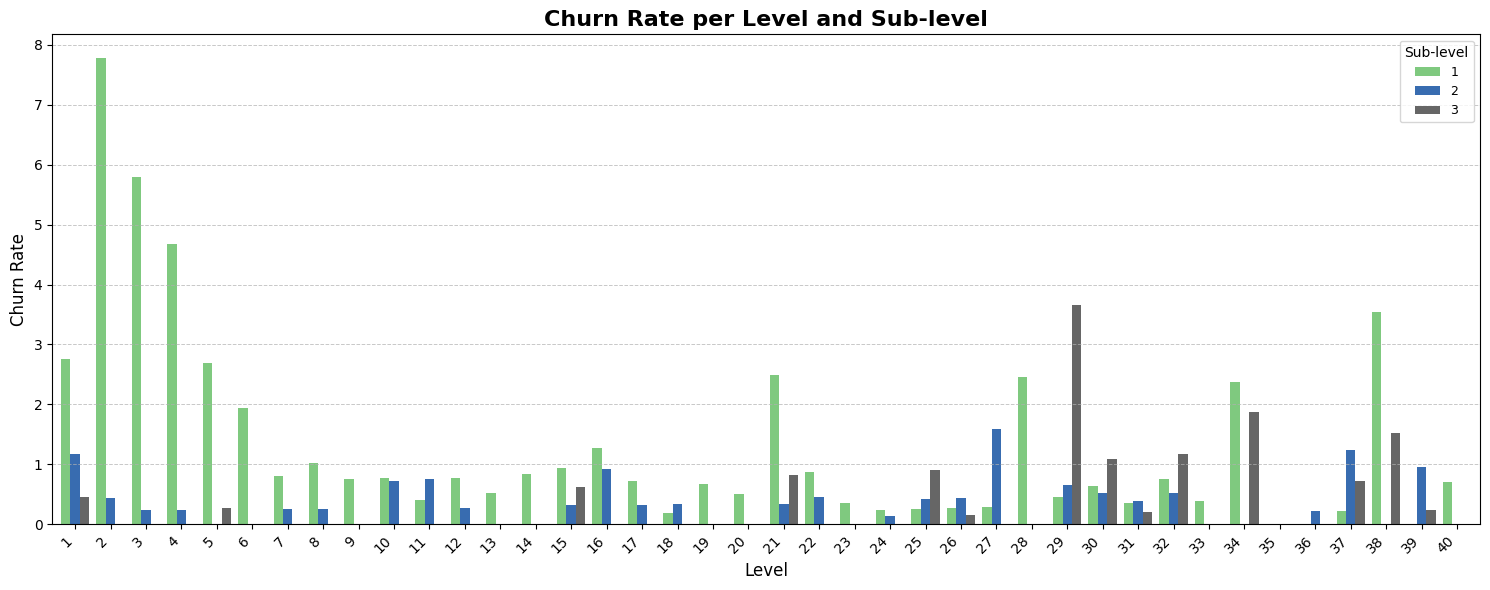

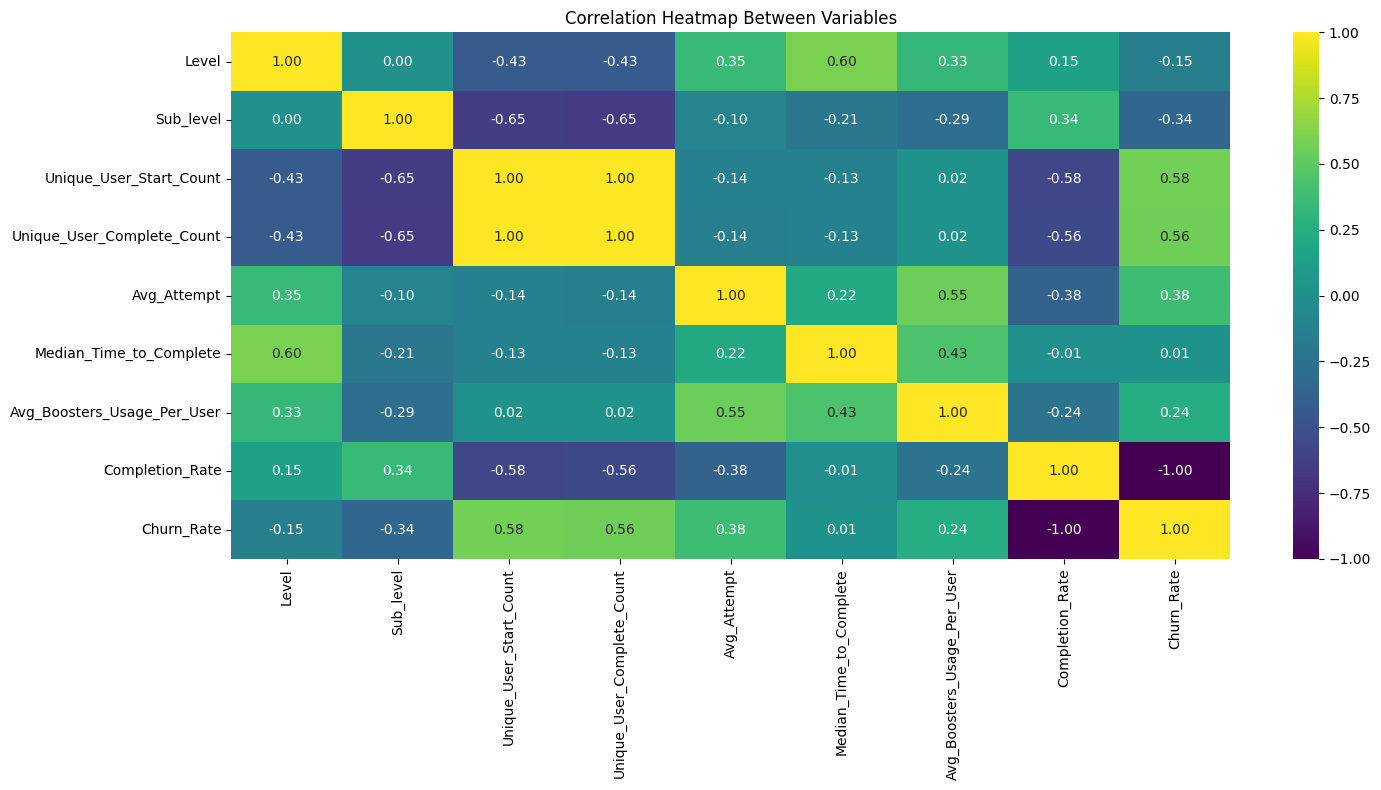

In [6]:
# Descriptive Analysis
print("Descriptive Statistics:\n", calculated.describe())  # Descriptive statistics for numeric variables

# Histogram for distribution of key variables
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.histplot(calculated['Completion_Rate'], kde=True)
plt.title('Distribution of Completion Rate')

plt.subplot(2, 2, 2)
sns.histplot(calculated['Avg_Attempt'], kde=True)
plt.title('Distribution of Average Attempts')

plt.subplot(2, 2, 3)
sns.histplot(calculated['Avg_Boosters_Usage_Per_User'], kde=True)
plt.title('Distribution of Average Boosters Usage')

plt.subplot(2, 2, 4)
sns.histplot(calculated['Median_Time_to_Complete'], kde=True)
plt.title('Distribution of Median Time to Complete (s)')

plt.tight_layout()
plt.savefig('histogram_distribution.jpg')  # Save as JPG
plt.show()

# Boxplot for Avg_Attempt and Completion_Rate
plt.figure(figsize=(15, 5))

## Boxplot for Completion_Rate per Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Level', y='Completion_Rate', data=calculated, palette='pastel')
plt.title('Boxplot of Completion Rate per Level')
plt.xlabel('Level')
plt.ylabel('Completion Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Boxplot for Avg_Attempt per Level
plt.subplot(1, 2, 2)
sns.boxplot(x='Level', y='Avg_Attempt', data=calculated, palette='pastel')
plt.title('Boxplot of Average Attempts per Level')
plt.xlabel('Level')
plt.ylabel('Average Attempts')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('boxplot_avg_attempt_completion_rate.jpg')  # Save as JPG
plt.show()

# Boxplot for Median_Time_to_Complete and Avg_Boosters_Usage_Per_User
plt.figure(figsize=(15, 5))

## Boxplot for Median_Time_to_Complete per Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Level', y='Median_Time_to_Complete', data=calculated, palette='pastel')
plt.title('Boxplot of Median Time to Complete per Level')
plt.xlabel('Level')
plt.ylabel('Median Time to Complete (s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Boxplot for Avg_Boosters_Usage_Per_User per Level
plt.subplot(1, 2, 2)
sns.boxplot(x='Level', y='Avg_Boosters_Usage_Per_User', data=calculated, palette='pastel')
plt.title('Boxplot of Average Boosters Usage per Level')
plt.xlabel('Level')
plt.ylabel('Average Boosters Usage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('boxplot_median_time_boosters_usage.jpg')  # Save as JPG
plt.show()

# Scatter plots for Avg_Boosters_Usage_Per_User vs Completion_Rate and Median_Time_to_Complete vs Churn_Rate
plt.figure(figsize=(15, 5))

## Scatter Plot: Avg_Boosters_Usage_Per_User vs Completion_Rate
plt.subplot(1, 3, 1)
plt.scatter(calculated['Avg_Boosters_Usage_Per_User'], calculated['Completion_Rate'], alpha=0.7, color='coral')
plt.title('Average Boosters Usage vs Completion Rate')
plt.xlabel('Average Boosters Usage per User')
plt.ylabel('Completion Rate (%)')
plt.grid(True)

## Scatter Plot: Median_Time_to_Complete vs Completion_Rate
plt.subplot(1, 3, 2)
plt.scatter(calculated['Median_Time_to_Complete'], calculated['Completion_Rate'], alpha=0.7, color='mediumslateblue')
plt.title('Median Time to Complete vs Completion Rate')
plt.xlabel('Median Time to Complete (seconds)')
plt.ylabel('Completion Rate (%)')
plt.grid(True)

## Scatter Plot: Avg_Attempt vs Completion_Rate
plt.subplot(1, 3, 3)
plt.scatter(calculated['Avg_Attempt'], calculated['Completion_Rate'], alpha=0.7, color='teal')
plt.title('Average Attempts vs Completion Rate')
plt.xlabel('Average Attempts')
plt.ylabel('Completion Rate (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('scatter_plots.jpg')  # Save as JPG
plt.show()

# Visualizing Churn Rate per Level and Sub-level
fig, ax = plt.subplots(figsize=(15, 6))
churn_rate = calculated.groupby(["Level", "Sub_level"])["Churn_Rate"].mean().unstack()
churn_rate.plot(kind='bar', ax=ax, width=0.8, cmap='Accent')
ax.set_title("Churn Rate per Level and Sub-level", fontsize=16, fontweight='bold')
ax.set_ylabel("Churn Rate", fontsize=12)
ax.set_xlabel("Level", fontsize=12)
ax.set_xticks(range(len(churn_rate.index)))
ax.set_xticklabels(churn_rate.index, rotation=45, ha='right', fontsize=10)
ax.legend(title="Sub-level", title_fontsize=10, fontsize=9, loc='upper right')
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.savefig('churn_rate_per_level.jpg')  # Save as JPG
plt.show()

# Correlation Heatmap
plt.figure(figsize=(15, 8))
corr_matrix = calculated.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap Between Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.jpg')  # Save as JPG
plt.show()

## Preliminary Conclusion

1. **General Data**:
   - The majority of levels show a high **Completion Rate** and low **Attempts**.
   - Some early levels have lower **Completion Rate** and higher **Churn Rate**.

2. **Interpretation**:
   - Most levels are relatively easy.
   - The difficulty level in the early levels may cause players to quit.

3. **Interesting Findings**:
   - **Completion Rate** is close to 100% on many levels.
   - High **Churn Rate** at the beginning of the level.

4. **Recommendations for Further Analysis**:
   - Test the hypothesis that entry level contributes to **churn**.
   - Using the results of **Exploratory Data Analysis (EDA)** to determine parameters to measure "Good" or "Bad", such as:
     - **Completion Rate**: A key variable as it shows the proportion of players who successfully complete a level. A low completion rate could be an indication of too high difficulty or unintuitive design.
     - **Churn Rate**: An important variable as it reflects player retention. A high churn rate indicates the level is causing players to leave the game.
     - **Median Time to Complete**: Useful for assessing the duration of the level. A very long or very short time compared to the average could be a sign of the level being too easy or difficult.
     - **Average Attempts**: Indicates the number of times the player must try to complete the level. A high number of attempts could be a sign of a difficult level.
     - **Average Boosters Usage**: Measures the usage of boosters. High booster usage could signify the difficulty of the level without assistance.

5. **Next Steps**:
   - Determine steps to fix the level appropriately.
   - Adjust difficulty at critical levels to reduce **churn**.

From the exploration of data (EDA) and the questions asked, here are the steps to answer each question and determine the right indicators to assess the levels:

### **1. Determine Indicators to Measure "Good" or "Bad "**

Based on the available variables:

- **Completion Rate**: A key variable as it indicates the proportion of players who successfully complete the level. A low completion rate could be an indication of too high difficulty or unintuitive design.
- **Churn Rate**: An important variable as it reflects player retention. A high churn rate indicates the level is causing players to leave the game.
- **Median Time to Complete**: Useful for assessing the duration of the level. A very long or very short time compared to the average could be a sign of the level being too easy or difficult.
- **Average Attempts**: Indicates the number of times the player must try to complete the level. A high number of attempts could be a sign of a difficult level.
- **Average Boosters Usage**: Measures the usage of boosters. High booster usage could signify the difficulty of the level without assistance.

**Reasons Not All Variables Are Indicators**:
- Not all variables have a direct relationship to play experience (e.g. number of unique players is not a direct indicator of level quality).
- Relevant variables should reflect difficulty, player experience, and retention.


### **2. Assessing Each Indicator**

Here's how to score each indicator based on distribution and EDA:

1. **Completion Rate**:
   - Threshold: Industry average or internal data average.
   - Level of **bad**: If Completion Rate < average - 1 standard deviation.
   - Good** level: If the Completion Rate is close to 100%.

2. **Churn Rate**:
   - Threshold: The average churn rate of the data.
   - Level of **bad**: If Churn Rate > average + 1 standard deviation.
   - Good** level: If the Churn Rate is close to 0%.

3. **Median Time to Complete**:
   - Threshold: Average completion time ± tolerance (10-20% of average).
   - Level **bad**: If the time is too long or too fast compared to the average.
   - Good** level: If the time is within the tolerance range.

4. **Average Attempts**:
   - Threshold: Average attempts ± tolerance.
   - **Worst** level: If the number of attempts > average + 1 standard deviation.
   - **good** level: If the number of attempts is close to the average.

5. **Average Boosters Usage**:
   - Threshold: Average usage ± tolerance.
   - **bad** level: If booster usage is much higher than average.
   - **good** level: If booster usage is low but Completion Rate remains high.

### Next Action**

1. Calculate the indicators for each level using the right method.
2. Identify levels with low scores as "bad" and high as "good."
3. Improvement suggestions for bad levels can focus on reducing churn, increasing completion rate, or adjusting time/boosters.

In [7]:
# Step 1: Define the necessary columns
columns = [
    'Completion_Rate',
    'Churn_Rate',
    'Median_Time_to_Complete',
    'Avg_Attempt',
    'Avg_Boosters_Usage_Per_User'
]

# Step 2: Calculate 25th and 75th percentiles for each column
percentiles = {}
for col in columns:
    percentiles[col] = {
        '25th': np.percentile(calculated[col], 25),
        '75th': np.percentile(calculated[col], 75)
    }

# Step 3: Categorize each level as "Good", "Bad", or "Average"
def categorize_level(row):
    # Initialize scores
    good_score = 0
    bad_score = 0

    for col in columns:
        # Compare with percentiles
        if row[col] >= percentiles[col]['75th']:
            good_score += 1  # If above 75th percentile, it's good
        elif row[col] <= percentiles[col]['25th']:
            bad_score += 1  # If below 25th percentile, it's bad

    # Final category assignment
    if good_score >= len(columns) * 0.5:  # More than half metrics are good
        return 'Good'
    elif bad_score >= len(columns) * 0.5:  # More than half metrics are bad
        return 'Bad'
    else:
        return 'Average'  # Otherwise, it's average

# Apply the function to categorize each level
calculated['Category'] = calculated.apply(categorize_level, axis=1)

# Step 4: Output results
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(calculated)

# Optional: Save results to a CSV file
calculated.to_csv("calculated_with_categories.csv", index=False)

,Level,Sub_level,Unique_User_Start_Count,Unique_User_Complete_Count,Avg_Attempt,Median_Time_to_Complete,Avg_Boosters_Usage_Per_User,Completion_Rate,Churn_Rate,Category
0,1,1,2500,2431,1.000000,0.000000,0.000000,97.240000,2.760000,Bad
1,1,2,510,504,1.000000,40.000000,0.000000,98.823529,1.176471,Bad
2,1,3,433,431,1.000000,48.000000,0.010000,99.538106,0.461894,Average
3,2,1,2389,2203,1.000000,49.000000,0.000000,92.214316,7.785684,Bad
4,2,2,452,450,1.000000,39.000000,0.010000,99.557522,0.442478,Average
5,2,3,404,404,1.000000,38.000000,0.010000,100.000000,0.000000,Bad
6,3,1,2173,2047,1.000000,56.000000,0.010000,94.201565,5.798435,Average
7,3,2,430,429,1.000000,44.000000,0.000000,99.767442,0.232558,Average
8,3,3,391,391,1.000000,43.000000,0.000000,100.000000,0.000000,Bad
9,4,1,2013,1919,1.000000,55.000000,0.010000,95.330353,4.669647,Average


### **Code Explanation**

1. **Calculating Percentiles**:
   - Uses `np.percentile` to calculate the **25th (Q1)** and **75th (Q3)** percentiles of each column.

2. **Classification**:
   - Levels are classified as follows:
     - **Good**: If more than half of the indicators are above the 75th percentile.
     - **Bad**: If more than half of the indicators are below the 25th percentile.
     - **Average**: If it does not fall into the categories of "Good" or "Bad."

3. **Flexibility**:
   - You can adjust the proportion of indicators to determine "Good" or "Bad." For example, changing `len(columns) * 0.5` to `len(columns) * 0.6` to tighten the criteria.

4. **Output**:
   - Displays the category for each level (Good, Bad, Average).
   - Optional: Save the results to a CSV file for further analysis.
  
### Why Percentile?
1. Data Characteristics:
    - The data shows a skewed distribution, with significant outliers.
    - Percentiles avoid the influence of outliers and provide a fairer division.
2. Flexibility:
    - Percentiles allow analysis of extreme categories (top 25% and bottom 25%).
    - Suitable for focusing on improving "bad" levels.
4. Prioritisation in Game Development:
   - In game development, focusing on low performers (below the 25th percentile) is more relevant for improving the player experience.

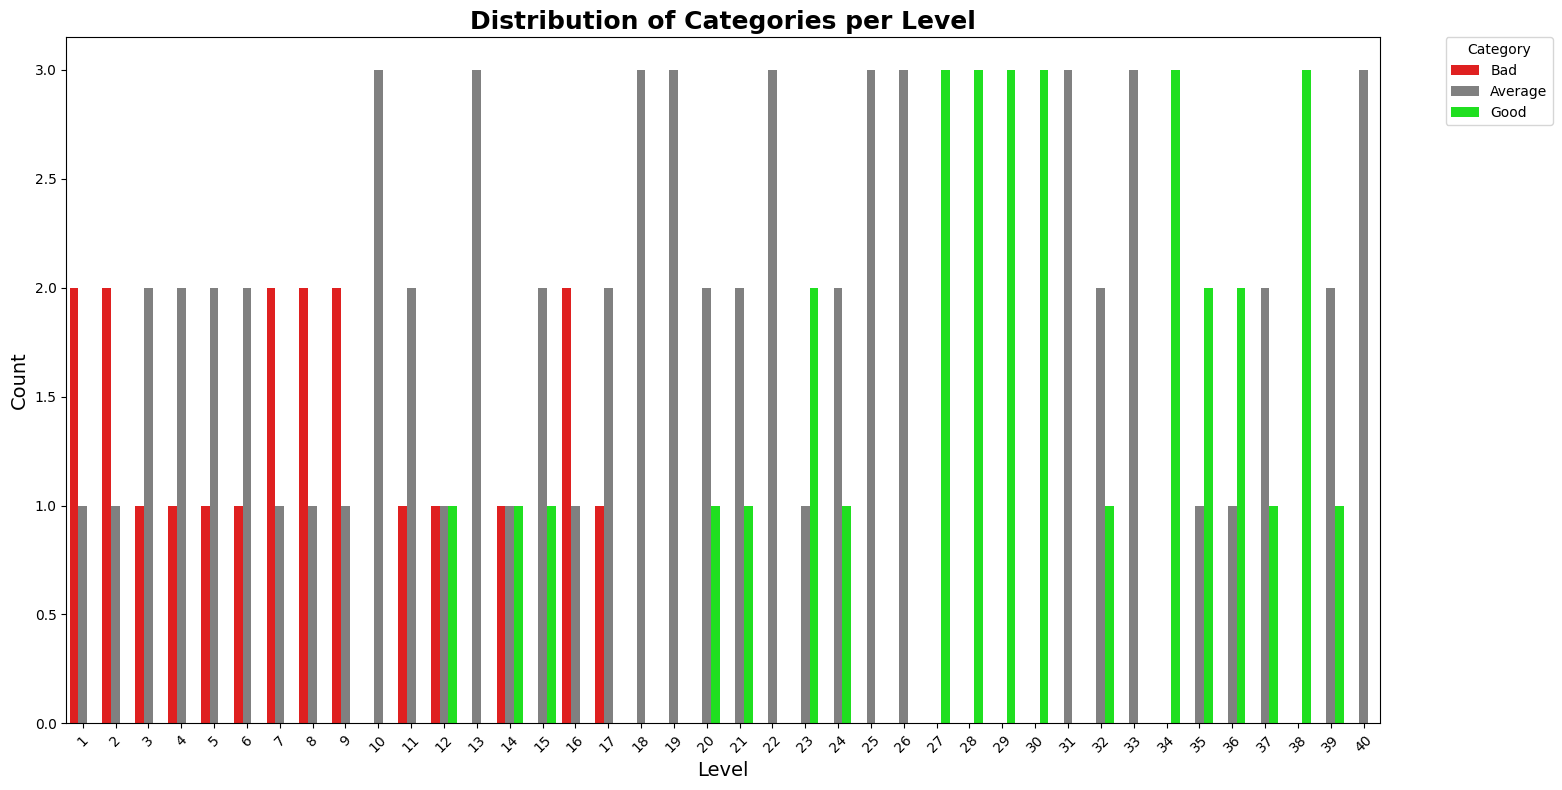

In [8]:
# Plot for the distribution of categories per level
colors = ['#FF0000', '#808080', '#00FF00']
plt.figure(figsize=(14, 8))
sns.countplot(
    data=calculated,
    x='Level',
    hue='Category',
    palette=colors
)

# Add labels and title
plt.title("Distribution of Categories per Level", fontsize=18, fontweight='bold')
plt.xlabel("Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Move the legend outside the plot
plt.legend(
    title="Category",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Save the plot as a JPG file
plt.savefig('distribution_of_categories_per_level.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()

### **1. Identify "Good" Levels and Reasons**
- **Criteria**:
  - **Completion Rate** is high (close to or equal to 100%).
  - **Churn Rate** is low (close to 0%).
  - **Median Time to Complete** within normal range (not too fast or slow).
  - **Average Attempts** low (around average, not too many attempts).
  - **Booster Usage** is low (players don't rely too much on help).

- "Good" Levels**:
  - Most levels with the **"Good "** category fulfil the above criteria.
  - From the `Category` category, levels categorised as **Good** have:
    - Very high average Completion Rate (>= 99.7%).
    - Very low Churn Rate (close to 0%).
    - Reasonable Median Time (around the overall median of 62.6 seconds).

### **2. Identify "Bad" Levels and Reasons**
- **Criteria**:
  - **Completion Rate** is low (well below average, e.g. <95%).
  - **Churn Rate** is high (above average, e.g. > 1.5%).
  - **Median Time to Complete** is too long (may exceed the 75th percentile, i.e. 73 seconds).
  - **Average Attempts** is high (well above average, e.g. > 1.2).
  - **Booster Usage** is high (players are using boosters too often, > 0.3).

- **"Bad" Levels**:
  - Most levels with the **"Bad "** category have these characteristics:
    - Completion Rate < 95%.
    - Churn Rate > 1.5%.
    - High Median Time (> 100 seconds).
    - Significant booster usage (> 0.5).
    - Example: Levels that tend to have extreme values in Churn Rate or very low Completion Rate.

### **Improvement Suggestions for "Poor" Level**

#### **1. Improve Level Design with Low Completion Rate**
- **Problem:**
  - Players have trouble completing the level.
- **Solution:**
  - Simplify the level design to reduce the initial difficulty, especially for the first levels (Levels 1-5).
  - Add visual guides or tutorials to help players understand the game mechanics.

#### **2. Reduce High Churn Rate**
- **Problem:**
  - Players quit after attempting a difficult level.
- **Solution:**
  - Increase rewards or incentives after completing levels, such as free coins or boosters.
  - Gradually reduce the difficulty level, especially at the beginning of the game.
  - Introduce challenges slowly so that players don't feel overwhelmed.

#### **3. Overcome Too Long Median Time**
- **Problem:**
  - Players are taking too long to complete levels.
- **Solution:**
  - Eliminate elements that make the level too long, such as too many steps or hard-to-achieve targets.
  - Divide long levels into several shorter sub-levels.

#### **4. Optimise Booster Usage**
- **Problem:**
  - Players rely too much on boosters.
- **Solution:**
  - Adjust the difficulty so that the player can complete the level without additional help.
  - Reduce the need for boosters by increasing the number of opportunities or steps given in the level.

#### **5. Reduce Average Attempts**
- **Problem:**
  - Players have to attempt the level many times.
- **Solution:**
  - Adjust the difficulty in the sections that cause the most failures.
  - Provide real-time feedback to players, such as strategy suggestions.

---

**Special Levels Requiring Attention**
#### **Level 1, Sub-level 1**
- **Problems:**
  - Median Time of 0 seconds indicates a design issue or bug.
- **Solution:**
  - Double check the completion mechanics and make sure the time is calculated correctly.
  - Add a tutorial to guide players through the first level.

#### **Level 2, Sub-level 1**
- **Problem:**
  - Low Completion Rate (92%) and high Churn Rate (7.8%).
- **Solution:**
  - Reduce challenges or targets to make the level easier.
  - Provide guidance for strategies to complete the level.

---

**General Recommendations**
1. **Do Playtesting:**
   - Test the improved level with real players to get immediate feedback.
   - Observe which parts make players feel frustrated or confused.

2. **Monitor Post-Fix Data:**
   - Monitor Completion Rate, Churn Rate, and Median Time after the fix to ensure that the changes have a positive impact.

3. **Iterate Gradually:**
   - Make small changes and test their effects before implementing a major overhaul.

# Evaluating the Impact of the “Leaderboard” Feature on Serenity’s Spa Performance

#### Problem Definition
Let’s say we launch a “Leaderboard” Feature for Serenity’s Spa. This feature is available to players who have passed level 50. The aim is to increase our play time and revenue. After launch, we got the following data:
- Only 20% of all players who install the game participate in this feature
- Before the feature was released, we had a DAU of 10,000 and Daily Revenue of 15,000$. After the feature is released, we boost our marketing campaign and increase our DAU to 25,000 and our Daily Revenue becomes 35,000.
- Before the feature was released, players played our game for 1hr a day, and this does not change after we release the feature.

#### Questions
- What is the ARPDAU of the game?
- Would you say this feature is a success? Explain your thought process
- What will be your recommendation for improvement of this feature?

# Serenity's Spa "Leaderboard" Feature Performance Analysis

## Introduction

This report analyzes the performance of the recently launched "Leaderboard" feature in Serenity's Spa. The feature, accessible to players who have reached level 50, aimed to increase both playtime and revenue. To assess its effectiveness, we will examine the provided data, focusing on key metrics such as ARPDAU (Average Revenue Per Daily Active User) and user engagement.

## Data Overview

| Metric | Before Feature Launch | After Feature Launch |
|---|---|---|
| Feature Participation | Not Applicable | 20% of all players |
| Daily Active Users (DAU) | 10,000 | 25,000 |
| Daily Revenue | USD15,000 | USD35,000 |
| Average Playtime | 1 hour per day | 1 hour per day |

While the specific breakdown of revenue sources (e.g., in-app purchases, ads) is not available, it's important to consider the different ways the game generates revenue when analyzing the impact of the Leaderboard feature^1^.

## ARPDAU Calculation and Analysis

To analyze the impact of the feature on revenue, we compared the ARPDAU before and after its launch^2^. ARPDAU is a crucial metric for evaluating the revenue generation capacity of a game on a per-user basis. It is calculated by dividing the total daily revenue by the number of daily active users.

**Before Feature Launch:**

- ARPDAU = USD15,000 / 10,000 users = $1.50

**After Feature Launch:**

- ARPDAU = USD35,000 / 25,000 users = $1.40

Surprisingly, the ARPDAU slightly decreased after the feature launch and marketing campaign. This indicates that while the overall revenue increased, the revenue generated per user did not increase proportionally with the rise in DAU. The decrease in ARPDAU could indicate that users are either spending less overall or that their spending habits have shifted since the introduction of the Leaderboard.

## Feature Impact Assessment

To accurately assess the "Leaderboard" feature's impact, we need to isolate its effects from the influence of the marketing campaign. Considering that only 20% of players engaged with the feature, we can estimate its contribution to the DAU and revenue increase as follows:

- **DAU Increase Attributable to the Feature:** 25,000 (total DAU) * 20% = 5,000 users

- **DAU Increase Attributable to Marketing:** 25,000 (total DAU) - 10,000 (initial DAU) - 5,000 (feature-related DAU) = 10,000 users

This analysis reveals that the marketing campaign played a more significant role in driving the overall DAU increase than the Leaderboard feature itself.

Analyzing the revenue increase is more complex without specific data on in-app purchases or spending habits related to the "Leaderboard" feature. It's crucial to understand how different user segments, particularly those engaged with the Leaderboard, contribute to overall revenue^3^. However, the decrease in ARPDAU suggests that the feature might not be directly driving a substantial increase in revenue per user.

## Feature Success Evaluation

To evaluate the success of the Leaderboard feature, we considered both the revenue increase and the percentage of players actively using it^4^. Based on the available data, it is difficult to definitively conclude whether the "Leaderboard" feature is a success. While the overall DAU and revenue increased, these increases appear largely driven by the marketing campaign. Furthermore, the feature's low participation rate (20%) and the decrease in ARPDAU raise concerns about its effectiveness in driving monetization.

## Recommendations for Improvement

To enhance the "Leaderboard" feature and potentially boost its impact on playtime and revenue, we recommend the following improvements:

- **Increase Feature Visibility and Appeal:** Promote the Leaderboard more prominently within the game to attract more players. This could involve in-game notifications, highlighting top players, or showcasing Leaderboard rewards^5^.

- **Incentivize Participation:** Introduce rewards or exclusive benefits for players who actively engage with the Leaderboard. This could include in-game currency, unique items, or cosmetic upgrades^6^.

- **Enhance Competitiveness:** Consider implementing tiered leaderboards, time-limited competitions, or special events to foster a more competitive environment and encourage ongoing engagement^7^.

- **Gamify the Experience:** Integrate elements of gamification, such as progress bars, achievements, or challenges, to make the Leaderboard more interactive and rewarding^8^.

- **Personalization:** Allow players to customize their Leaderboard profiles, track their progress over time, and compare their performance with friends or other players with similar skill levels^9^.

## Industry Benchmarks and Playtime Considerations

While specific industry benchmarks for ARPDAU in casual games vary, data suggests that ARPDAU for hyper-casual games ranges from USD0.10 to USD0.12^10^.([https://blogs.geniteam.com/arpdau-games/](https://blogs.geniteam.com/arpdau-games/)) Serenity's Spa, with an ARPDAU of $1.40 after the feature launch, appears to be performing well above this benchmark. However, it's crucial to compare these figures with benchmarks for similar spa or simulation games for a more accurate assessment. For instance, data from GameAnalytics indicates that in 2019, the ARPDAU for Role Playing and Strategy games was significantly higher than other genres, converting 5-7x more than casual games^11^. This highlights the importance of considering genre-specific benchmarks when evaluating the game's performance.

To increase playtime alongside revenue, consider the following strategies:

- **Content Updates:** Regularly introduce new content, such as spa treatments, decorations, or storylines, to keep players engaged and provide fresh challenges^12^.

- **Social Features:** Encourage social interaction by allowing players to visit each other's spas, exchange gifts, or participate in cooperative challenges^13^.

- **Events and Challenges:** Introduce time-limited events or daily challenges with attractive rewards to incentivize regular playtime^14^.

- **Progression Systems:** Implement a clear and rewarding progression system that motivates players to continue playing and unlock new content^15^.

These strategies, combined with improvements to the Leaderboard feature, can create a more engaging and rewarding experience for players, potentially leading to increased playtime and revenue.

## Conclusion

The "Leaderboard" feature in Serenity's Spa has shown mixed results. While the overall DAU and revenue have increased, these improvements appear largely driven by the marketing campaign rather than the feature itself. The relatively low participation rate and the decrease in ARPDAU suggest that the Leaderboard may not be effectively driving monetization or significantly impacting user spending habits.

However, by implementing the recommendations outlined in this report, such as increasing feature visibility, incentivizing participation, and enhancing competitiveness, Serenity's Spa can improve the Leaderboard's appeal and encourage greater user engagement. Additionally, focusing on content updates, social features, and a rewarding progression system can further enhance the player experience and potentially drive increased playtime and revenue.

Further analysis of user segmentation based on Leaderboard engagement and a deeper understanding of player spending patterns would provide valuable insights for optimizing the feature and maximizing its impact on key performance indicators. By continuously monitoring and iterating on the Leaderboard feature, Serenity's Spa can unlock its full potential and achieve its goals of increased playtime and revenue.

#### Reference List

1. 4 Ways Feature Requests Could Impact Revenue | Amoeboids, accessed on December 13, 2024, [https://amoeboids.com/blog/estimating-the-revenue-potential-for-your-feature-requests/](https://amoeboids.com/blog/estimating-the-revenue-potential-for-your-feature-requests/)
2. What Is ARPU? Meaning, Formula, and Calculator - Udonis Blog, accessed on December 13, 2024, [https://www.blog.udonis.co/analytics/calculate-and-increase-arpu-and-arpdau](https://www.blog.udonis.co/analytics/calculate-and-increase-arpu-and-arpdau)
3. How to evaluate your product's existing features? - Oneeleven, accessed on December 13, 2024, [https://oneeleven.com/how-to-evaluate-your-products-existing-features/](https://oneeleven.com/how-to-evaluate-your-products-existing-features/)
4. How Product Leaders Can Evaluate Features Based on Business ..., accessed on December 13, 2024, [https://medium.com/agileinsider/how-product-leaders-can-evaluate-features-based-on-business-impact-1146a8878e65](https://medium.com/agileinsider/how-product-leaders-can-evaluate-features-based-on-business-impact-1146a8878e65)
5. 7 Curated Strategies for Increasing Feature Engagement for SaaS - Userpilot, accessed on December 13, 2024, [https://userpilot.com/blog/increasing-feature-engagement-saas/](https://userpilot.com/blog/increasing-feature-engagement-saas/)
6. How to Promote New Features for Higher Awareness and Adoption - UserGuiding, accessed on December 13, 2024, [https://userguiding.com/blog/promote-new-feature](https://userguiding.com/blog/promote-new-feature)
7. The Significance of Daily Active Users (DAU) and the Keys to Its Growth - Medium, accessed on December 13, 2024, [https://medium.com/@happycatc/the-significance-of-daily-active-users-dau-and-the-keys-to-its-growth-d8d92d053050](https://medium.com/@happycatc/the-significance-of-daily-active-users-dau-and-the-keys-to-its-growth-d8d92d053050)
8. Top 8 Strategies to Boost Feature Adoption in 2023 - Upshot.ai, accessed on December 13, 2024, [https://www.upshot.ai/blog/top-8-strategies-to-boost-feature-adoption](https://www.upshot.ai/blog/top-8-strategies-to-boost-feature-adoption)
9. Boosting feature adoption: Strategies that work - Statsig, accessed on December 13, 2024, [https://www.statsig.com/perspectives/boosting-feature-adoption-strategies-that-work](https://www.statsig.com/perspectives/boosting-feature-adoption-strategies-that-work)
10. ARPDAU for Mobile Games - Game Development News - GenITeam, accessed on December 13, 2024, [https://blogs.geniteam.com/arpdau-games/](https://blogs.geniteam.com/arpdau-games/)
11. Mobile Gaming Benchmarks - InvestGame, accessed on December 13, 2024, [https://investgame.net/wp-content/uploads/2023/06/H1-2019-Mobile-Benchmarks-Report-GameAnalytics.pdf](https://investgame.net/wp-content/uploads/2023/06/H1-2019-Mobile-Benchmarks-Report-GameAnalytics.pdf)
12. 6 Easy Ways to Boost Brainpower During Playtime - Michigan Medicine, accessed on December 13, 2024, [https://www.michiganmedicine.org/health-lab/6-easy-ways-boost-brainpower-during-playtime](https://www.michiganmedicine.org/health-lab/6-easy-ways-boost-brainpower-during-playtime)
13. 10 tips to make playtimes better - Outdoor Classroom Day, accessed on December 13, 2024, [https://outdoorclassroomday.com/resource/10-tips-to-make-playtimes-better/](https://outdoorclassroomday.com/resource/10-tips-to-make-playtimes-better/)
14. The stress of recess: Here's how schools are improving playtime | K-12 Dive, accessed on December 13, 2024, [https://www.k12dive.com/news/recess-play-at-schools-children/716954/](https://www.k12dive.com/news/recess-play-at-schools-children/716954/)
15. How do you actually improve after you have already played for 1000 hours yet seem like your only average. : r/summonerschool - Reddit, accessed on December 13, 2024, [https://www.reddit.com/r/summonerschool/comments/v25vwu/how_do_you_actually_improve_after_you_have/](https://www.reddit.com/r/summonerschool/comments/v25vwu/how_do_you_actually_improve_after_you_have/)

# **AB Test Analysis: Conduct statistical evaluation to validate the test and analyze the impact on player purchasing behavior.**

To improve the Monetisation, we launched an AB Test to reduce our IAP pricing. We keep the content type the same, but reduce the quantity to match the new pricing. 
Our hypothesis is that reducing the price can increase our conversion rate and in total increase our revenue. After testing for 1 week, we got the following data : AB Test Data
QUESTIONS
1. Is the AB test valid from a statistical point of view?
2. Assuming it’s valid, is the AB test a success? Explain your thought process
3. What insight can we get from player’s purchase behavior from this AB test?
4. Suppose we want to run another AB test, what changes would you suggest?


### **A. Statistical Validity of A/B Test**
1. **Sample Distribution and Randomisation:**
   - Total players: 2.500
   - Control: 1,224 players
   - Variant: 1,276 players
   
   The sample split between the Control and Variant groups was relatively even. This is in accordance with optimal practice in A/B testing, where both groups should be close to equal in size to minimise bias and increase statistical power (Kohavi et al., 2007; Kohavi & Thomke, 2017).

2. **Test Duration:**
   - The test runs for 1 week. While 1 week may provide an initial indication, some literature suggests a longer duration to capture long-term behavioural variations (Kohavi & Longbotham, 2017). However, as a first step, this duration is acceptable to at least get an initial signal.

3. **Available Data and Significance Tests:**
   - The data presented includes the number of unique buyers, total transactions, and price per IAP.  
   - To test the significance of the change in conversion, we can perform a simple proportion z-test on the conversion of the item with the most obvious difference, such as IAP-1.  
   
   **Example Test (IAP-1 Conversion):**
   - Conversion on Control for IAP-1: 44 unique buyers out of 1,224 players → Conversion rate ≈ 3.6%.  
   - Conversion on Variant for IAP-1: 70 unique buyers out of 1,276 players → Conversion rate ≈ 5.5%.  
   
   Intuitively, the increase from 3.6% to 5.5% is considerable. References in online experiments (Kohavi et al., 2007) state that measurable and replicable differences in conversion rates generally indicate test validity.

**Conclusion of Validity:**
Methodologically, this A/B test can be considered valid. The group split was balanced, the minimum duration was met, and there were indications of significant conversion changes in the key item (IAP-1). However, the total revenue analysis would be more robust if supported by per-user data as well as more in-depth statistical tests (Kohavi & Thomke, 2017).


### **B. Was the A/B Test a Success?**
1. **Main Objective:**
   Hypothesis: Lowering prices will increase conversions, and ultimately increase total revenue.

2. **Total Revenue Comparison:**
   - Control (total estimate): ±\$1,074
   - Variant (total estimate): ±\$1,164
   
   An increase of about \$90 or about +8.4%. Whilst not huge, it is still a positive increase.

3. **ARPU (Average Revenue Per User):**
   - Control: ±\$0.877
   - Variant: ±\$0.912
   
   ARPU increased by approximately \$0.035 per player, indicating that the average revenue per player is slightly higher in Variant.

4. **Significant IAP-1 Conversion:**
   - The significant difference in conversion on IAP-1 supports the hypothesis that lower prices encourage more players to purchase. According to the theory of price and demand, lowering price barriers can increase the number of buyers (Mankiw, 2018, pp. 448).

**Conclusion of Success:**
From the perspective of the original objectives (increasing conversions and total revenue), there are indications of success. Although the increase was not very dramatic, the results were as expected: conversions went up, total revenue went up, and ARPU also increased moderately. This can be considered an initial success that supports the hypothesis.


### **C. Insights from Player Behaviour:**
1. **Price Sensitivity on High-Value Items:**
   - IAP-1 (Permanent Upgrade) shows the clearest conversion response. The price drop on permanent items increased the number of unique buyers significantly. This suggests that players are price-sensitive on items with long-term value.

2. **Volume vs. Margin:**
   - Despite the price drop, an increase in overall purchase volume can offset lower margins, resulting in increased total revenue. This is in line with the concept of price elasticity, where lowering prices can increase total demand (Mankiw, 2018, pp. 90-95).

3. **Preference for a "Good Deal":**
   - Players appear to respond positively when they feel they are getting a more affordable deal. This also reflects the importance of perceived value in purchase decision-making.


### **D. Suggestions for Future A/B Tests:**
1. **Extend Test Duration:**
   - Run the test longer (2 weeks or more) so that the results are more stable and representative of medium-term behavioural patterns (Kohavi & Longbotham, 2017).

2. **Segmentation Based on Player Profile:**
   - Analyses based on player types (e.g. active players, new players, old players) can reveal which segments are most responsive to price changes (Deng et al., 2013).

3. **Focus on One IAP or Different Price Variations:**
   - Try a test that specifically focuses on 1 IAP (e.g. IAP-1) with multiple price variants to map price elasticity and find the optimal price point (Leeflang et al., 2015, pp. 2-4).

4. **Test Bundling:**
   - Consider not only lowering prices, but also reorganising bundled offerings so that players experience greater "value" at prices that are slightly higher but still cheaper than the initial offering (Mankiw, 2018, pp. 426-428)...

5. **Deeper Statistical Analyses:**
   - Use non-parametric testing methods (e.g. permutation tests) or bootstrapping on granular (per-user) data to increase confidence in statistical inferences (Deng et al., 2013).


**References:**
- Deng, A., et al. (2013). "Improving the sensitivity of online controlled experiments by utilising pre-experiment data." *KDD '13: Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining*, pp. 1239-1247.  
- Kohavi, R., Henne, R.M., Sommerfield, D. (2009). "Practical Guide to Controlled Experiments on the Web: Listen to Your Customers not to the HiPPO." *KDD '09 Proceedings*, pp. 959-967.  
- Kohavi, R., Longbotham, R. (2017). "Online Controlled Experiments and A/B Testing." In *Emerging Trends in the Social and Behavioural Sciences*, Wiley.  
- Kohavi, R., Thomke, S. (2017). "The Surprising Power of Online Experiments." *Harvard Business Review*, 95(5), 74-82.  
- Leeflang, P.S.H., Wieringa, J.E., Bijmolt, T.H.A., Pauwels, K. (2015). *Modelling Markets: Analysing Marketing Phenomena and Improving Marketing Decision Making.* Springer. Cengage Learning.
- Mankiw, N.G. (2018). *Principles of Economics (8th ed.)*. Cengage Learning.

### Reference List

#### Online Resources
- Amoeboids. (n.d.). *4 ways feature requests could impact revenue*. Retrieved December 13, 2024, from [https://amoeboids.com/blog/estimating-the-revenue-potential-for-your-feature-requests/](https://amoeboids.com/blog/estimating-the-revenue-potential-for-your-feature-requests/)
- Udonis Blog. (n.d.). *What is ARPU? Meaning, formula, and calculator*. Retrieved December 13, 2024, from [https://www.blog.udonis.co/analytics/calculate-and-increase-arpu-and-arpdau](https://www.blog.udonis.co/analytics/calculate-and-increase-arpu-and-arpdau)
- Oneeleven. (n.d.). *How to evaluate your product's existing features?* Retrieved December 13, 2024, from [https://oneeleven.com/how-to-evaluate-your-products-existing-features/](https://oneeleven.com/how-to-evaluate-your-products-existing-features/)
- Agile Insider. (n.d.). *How product leaders can evaluate features based on business impact*. Retrieved December 13, 2024, from [https://medium.com/agileinsider/how-product-leaders-can-evaluate-features-based-on-business-impact-1146a8878e65](https://medium.com/agileinsider/how-product-leaders-can-evaluate-features-based-on-business-impact-1146a8878e65)
- Userpilot. (n.d.). *7 curated strategies for increasing feature engagement for SaaS*. Retrieved December 13, 2024, from [https://userpilot.com/blog/increasing-feature-engagement-saas/](https://userpilot.com/blog/increasing-feature-engagement-saas/)
- UserGuiding. (n.d.). *How to promote new features for higher awareness and adoption*. Retrieved December 13, 2024, from [https://userguiding.com/blog/promote-new-feature](https://userguiding.com/blog/promote-new-feature)
- Happycatc. (n.d.). *The significance of daily active users (DAU) and the keys to its growth*. Retrieved December 13, 2024, from [https://medium.com/@happycatc/the-significance-of-daily-active-users-dau-and-the-keys-to-its-growth-d8d92d053050](https://medium.com/@happycatc/the-significance-of-daily-active-users-dau-and-the-keys-to-its-growth-d8d92d053050)
- Upshot.ai. (n.d.). *Top 8 strategies to boost feature adoption in 2023*. Retrieved December 13, 2024, from [https://www.upshot.ai/blog/top-8-strategies-to-boost-feature-adoption](https://www.upshot.ai/blog/top-8-strategies-to-boost-feature-adoption)
- Statsig. (n.d.). *Boosting feature adoption: Strategies that work*. Retrieved December 13, 2024, from [https://www.statsig.com/perspectives/boosting-feature-adoption-strategies-that-work](https://www.statsig.com/perspectives/boosting-feature-adoption-strategies-that-work)
- GenITeam. (n.d.). *ARPDAU for mobile games - Game development news*. Retrieved December 13, 2024, from [https://blogs.geniteam.com/arpdau-games/](https://blogs.geniteam.com/arpdau-games/)
- InvestGame. (n.d.). *Mobile gaming benchmarks*. Retrieved December 13, 2024, from [https://investgame.net/wp-content/uploads/2023/06/H1-2019-Mobile-Benchmarks-Report-GameAnalytics.pdf](https://investgame.net/wp-content/uploads/2023/06/H1-2019-Mobile-Benchmarks-Report-GameAnalytics.pdf)
- Michigan Medicine. (n.d.). *6 easy ways to boost brainpower during playtime*. Retrieved December 13, 2024, from [https://www.michiganmedicine.org/health-lab/6-easy-ways-boost-brainpower-during-playtime](https://www.michiganmedicine.org/health-lab/6-easy-ways-boost-brainpower-during-playtime)
- Outdoor Classroom Day. (n.d.). *10 tips to make playtimes better*. Retrieved December 13, 2024, from [https://outdoorclassroomday.com/resource/10-tips-to-make-playtimes-better/](https://outdoorclassroomday.com/resource/10-tips-to-make-playtimes-better/)
- K-12 Dive. (n.d.). *The stress of recess: Here's how schools are improving playtime*. Retrieved December 13, 2024, from [https://www.k12dive.com/news/recess-play-at-schools-children/716954/](https://www.k12dive.com/news/recess-play-at-schools-children/716954/)
- Reddit. (n.d.). *How do you actually improve after you have already played for 1000 hours yet seem like your only average?* Retrieved December 13, 2024, from [https://www.reddit.com/r/summonerschool/comments/v25vwu/how_do_you_actually_improve_after_you_have/](https://www.reddit.com/r/summonerschool/comments/v25vwu/how_do_you_actually_improve_after_you_have/)

#### Academic Sources
- Deng, A., et al. (2013). "Improving the sensitivity of online controlled experiments by utilising pre-experiment data." *KDD '13: Proceedings of the 19th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 1239-1247.
- Kohavi, R., Henne, R.M., Sommerfield, D. (2009). "Practical guide to controlled experiments on the web: Listen to your customers not to the HiPPO." *KDD '09 Proceedings*, 959-967.
- Kohavi, R., Longbotham, R. (2017). "Online controlled experiments and A/B testing." In *Emerging Trends in the Social and Behavioral Sciences*, Wiley.
- Kohavi, R., Thomke, S. (2017). "The surprising power of online experiments." *Harvard Business Review, 95*(5), 74-82.
- Leeflang, P.S.H., Wieringa, J.E., Bijmolt, T.H.A., & Pauwels, K. (2015). *Modeling markets: Analyzing marketing phenomena and improving marketing decision making*. Springer.
- Mankiw, N.G. (2018). *Principles of economics* (8th ed.). Cengage Learning.